In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
df=pd.read_csv(r"/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
Missing_value=df.isnull().sum()
Missing_value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
missing_precentage=Missing_value/len(df)*100
missing_df=pd.DataFrame({'missing_values':Missing_value,'missing_precentage':missing_precentage})
missing_df

,missing_values,missing_precentage
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [35]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [36]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [37]:
# Fill missing values in 'Embarked' with the mode (most frequent value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [38]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [39]:
df.drop('Cabin', axis=1, inplace=True, errors='ignore')


In [40]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [41]:
# Check column names in your DataFrame
print(df.columns)



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [42]:
# Strip any leading or trailing spaces from all column names
df.columns = df.columns.str.strip()

# Verify column names again
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [43]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Example: Encoding the 'Pclass' feature
df['Pclass'] = label_encoder.fit_transform(df['Pclass'])


In [44]:
# 2. One-Hot Encoding for 'Sex' and 'Embarked' (nominal features)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Check the resulting dataframe
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       2   
1            2         1       0   
2            3         1       2   
3            4         1       0   
4            5         0       2   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500      True       False        True  
1          PC 17599  71.2833     False       False       False  
2  STON/O2. 3101282   7.9250     False       False        True  
3            113803  53.1000     False       False        True  
4

In [45]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to 'Age' and 'Fare'
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Check the data after scaling
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       2   
1            2         1       0   
2            3         1       2   
3            4         1       0   
4            5         0       2   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.565736      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.663861      1      0   
2                             Heikkinen, Miss. Laina -0.258337      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.433312      1      0   
4                           Allen, Mr. William Henry  0.433312      0      0   

             Ticket      Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171 -0.502445      True       False        True  
1          PC 17599  0.786845     False       False       False  
2  STON/O2. 3101282 -0.488854     False       False        True  
3            113803  0.420730     Fals

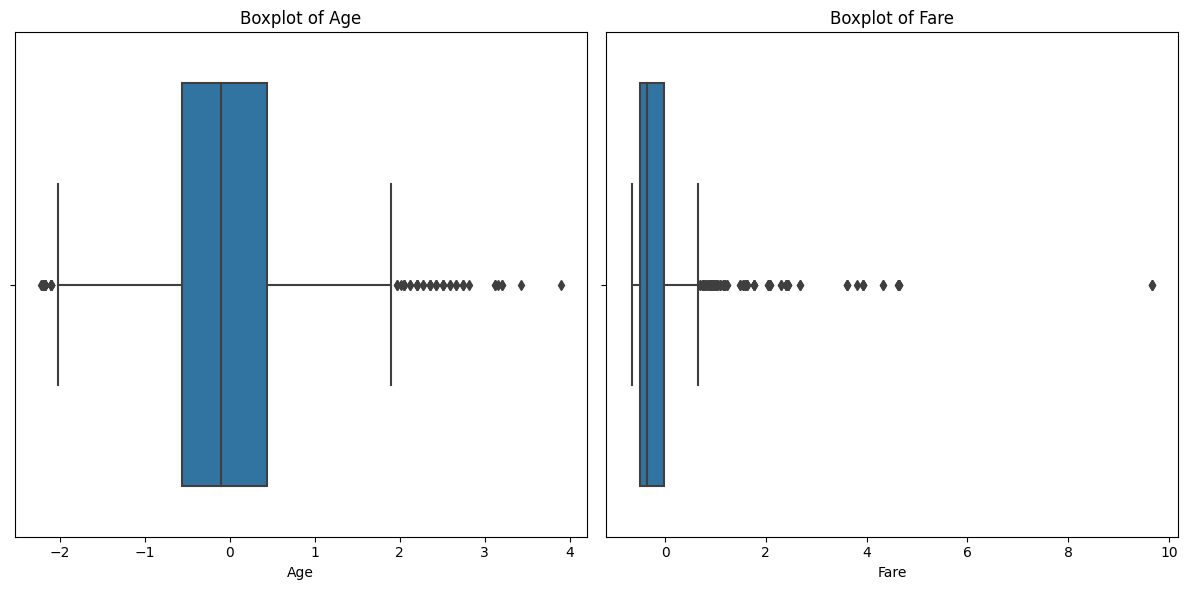

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for 'Age' and 'Fare' to visualize outliers
plt.figure(figsize=(12, 6))

# Boxplot for 'Age'
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Age')
plt.title('Boxplot of Age')

# Boxplot for 'Fare'
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Fare')
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()


In [47]:
# Calculate IQR for 'Age'
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Calculate IQR for 'Fare'
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

# Define lower and upper bounds for 'Age' and 'Fare'
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

# Remove outliers by filtering the DataFrame
df_cleaned = df[(df['Age'] >= lower_bound_age) & (df['Age'] <= upper_bound_age) &
                (df['Fare'] >= lower_bound_fare) & (df['Fare'] <= upper_bound_fare)]

# Check the data after removing outliers
print(df_cleaned.shape)


(721, 12)


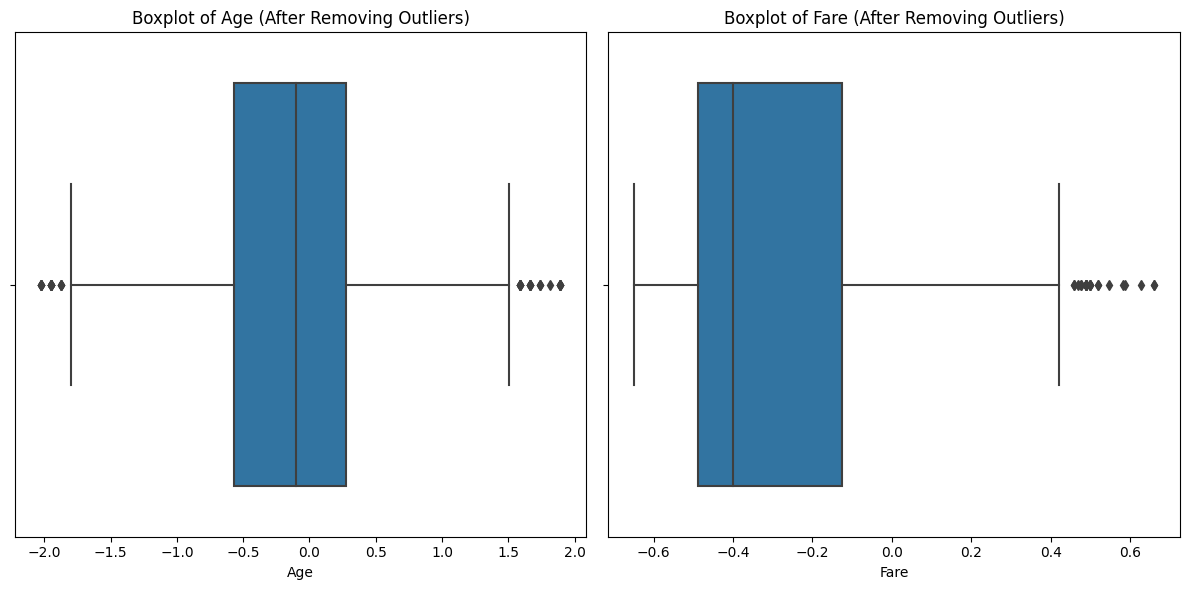

In [48]:
# Create boxplots again for 'Age' and 'Fare' to visualize the cleaned data
plt.figure(figsize=(12, 6))

# Boxplot for 'Age' after outlier removal
plt.subplot(1, 2, 1)
sns.boxplot(data=df_cleaned, x='Age')
plt.title('Boxplot of Age (After Removing Outliers)')

# Boxplot for 'Fare' after outlier removal
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned, x='Fare')
plt.title('Boxplot of Fare (After Removing Outliers)')

plt.tight_layout()
plt.show()


In [49]:
# Summary statistics before removing outliers
print("Summary Statistics (Before Removing Outliers):")
print(df[['Age', 'Fare']].describe())

# Summary statistics after removing outliers
print("\nSummary Statistics (After Removing Outliers):")
print(df_cleaned[['Age', 'Fare']].describe())


Summary Statistics (Before Removing Outliers):
                Age          Fare
count  8.910000e+02  8.910000e+02
mean   2.232906e-16 -1.993666e-18
std    1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01
25%   -5.657365e-01 -4.891482e-01
50%   -1.046374e-01 -3.573909e-01
75%    4.333115e-01 -2.424635e-02
max    3.891554e+00  9.667167e+00

Summary Statistics (After Removing Outliers):
              Age        Fare
count  721.000000  721.000000
mean    -0.097389   -0.298283
std      0.770186    0.273087
min     -2.025883   -0.648422
25%     -0.565736   -0.489442
50%     -0.104637   -0.401268
75%      0.279612   -0.124920
max      1.893459    0.660333


In [50]:
# Print the shape of the original and cleaned dataset
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")


Original dataset shape: (891, 12)
Cleaned dataset shape: (721, 12)
